In [2]:
# !pip install gdown
import gdown
import pandas as pd

In [ ]:


# URL corregida (con uc?id=)
url_aisle = "https://drive.google.com/uc?id=1pxWIx_32NdXN7t7r8axTDD0FWIAiHFw0"
url_departments = "https://drive.google.com/uc?id=1gMlH8PfLB5b8eVV1QuXI71GaxwpV_4EA"
url_orders = "https://drive.google.com/uc?id=1qR3CfKei5kacImYQz7x0xAypO4sm5H5O"
url_orders_products_prior = "https://drive.google.com/uc?id=1nzd1C2Cc00854bDo7JznkIh9Q0zwIqyv"
url_orders_products_train = "https://drive.google.com/uc?id=1vwOFeI8XWhe_ZlMb_r81jGwD0OKt8a2w"
url_products = "https://drive.google.com/uc?id=1--mja_wkttg8BFLBxvQhxJ_jIAw1_9B3"


# Descargar el archivo como aisles.csv
gdown.download(url_aisle, 'data/aisles.csv', quiet=False)
gdown.download(url_departments, 'data/departments.csv', quiet=False)
gdown.download(url_orders, 'data/orders.csv', quiet=False)
gdown.download(url_orders_products_prior, 'data/order_products__prior.csv', quiet=False)
gdown.download(url_orders_products_train, 'data/order_products__train.csv', quiet=False)
gdown.download(url_products, 'data/products.csv', quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1pxWIx_32NdXN7t7r8axTDD0FWIAiHFw0
To: c:\Users\cesar\Documents\Proyecto 4 Recomendaciones\data\aisles.csv
100%|██████████| 2.60k/2.60k [00:00<00:00, 11.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gMlH8PfLB5b8eVV1QuXI71GaxwpV_4EA
To: c:\Users\cesar\Documents\Proyecto 4 Recomendaciones\data\departments.csv
100%|██████████| 270/270 [00:00<00:00, 1.03MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1qR3CfKei5kacImYQz7x0xAypO4sm5H5O
From (redirected): https://drive.google.com/uc?id=1qR3CfKei5kacImYQz7x0xAypO4sm5H5O&confirm=t&uuid=ba263364-5737-4a63-932b-f79efce2447b
To: c:\Users\cesar\Documents\Proyecto 4 Recomendaciones\data\orders.csv
100%|██████████| 109M/109M [00:10<00:00, 9.98MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1nzd1C2Cc00854bDo7JznkIh9Q0zwIqyv
From (redirected): https://drive.google.com/uc?id=1nzd1C2Cc00854bDo7JznkIh9Q0zwIqyv&confirm=t&uuid=d626efc8-29f7-4d64-b8c1-

🛒 Aisles DataFrame:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

--------------------------------------------------

🏷 Departments DataFrame:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

--------------------------------------------------

📦 Orders DataFrame:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior       

In [4]:
# Leer el CSV
df_aisles = pd.read_csv('data/aisles.csv')
df_departments = pd.read_csv('data/departments.csv')
df_orders = pd.read_csv('data/orders.csv')
df_order_products_prior = pd.read_csv('data/order_products__prior.csv')
df_order_products_train = pd.read_csv('data/order_products__train.csv')
df_products = pd.read_csv('data/products.csv')

# Mostrar los primeros registros de cada DataFrame con separación
print("🛒 Aisles DataFrame:")
print(df_aisles.head())
print("\n" + "-"*50 + "\n")

print("🏷 Departments DataFrame:")
print(df_departments.head())
print("\n" + "-"*50 + "\n")

print("📦 Orders DataFrame:")
print(df_orders.head())
print("\n" + "-"*50 + "\n")

print("📋 Order Products Prior DataFrame:")
print(df_order_products_prior.head())
print("\n" + "-"*50 + "\n")

print("📋 Order Products Train DataFrame:")
print(df_order_products_train.head())
print("\n" + "-"*50 + "\n")

print("📦 Products DataFrame:")
print(df_products.head())

C:\Users\joant\AppData\Local\Temp\ipykernel_9744\3778648526.py:4: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orders = pd.read_csv('data/orders.csv')


🛒 Aisles DataFrame:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

--------------------------------------------------

🏷 Departments DataFrame:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

--------------------------------------------------

📦 Orders DataFrame:
   order_id user_id eval_set order_number  order_dow  order_hour_of_day  \
0   2539329       1    prior            1          2                8.0   
1   2398795       1    prior            2          3                7.0   
2    473747       1    prior            3          3               12.0   
3   2254736       1    prior            4          4                7.0   
4    431534       1    prior            5     

# **SEGMENTACION POR CANTIDAD DE PEDIDOS TOTALES Y CADA CUANTO PIDE **

Preparamos los datos en un csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df_user_last_order = df_orders.groupby('user_id')['order_number'].max().reset_index()

df_user_last_order = df_user_last_order.merge(df_orders[['user_id', 'order_number', 'days_since_prior_order']],
                                              on=['user_id', 'order_number'],
                                              how='left')
# Mostrar las primeras filas del DataFrame resultante
df_user_last_order.head()

user_orders = df_orders.groupby('user_id').agg(
    n_compras=('order_id', 'nunique'),
).reset_index()

# Obtener el valor de 'days_since_prior_order' para el pedido con el mayor 'order_number' por usuario
user_orders['last_order_date'] = df_user_last_order.groupby('user_id')['days_since_prior_order'].transform('last')

user_orders.set_index('user_id', inplace=True)
# Ahora, calculamos la diferencia en días entre los pedidos consecutivos
user_orders['mean_time_between_orders'] = df_orders.groupby('user_id')['days_since_prior_order'].sum() / user_orders['n_compras']

# Mostrar las primeras filas del DataFrame resultante
user_orders.head()

user_orders.to_csv('data/user_orders_data.csv', index=True)


Segmentar a los usuarios

In [6]:
import pandas as pd

# Suponiendo que 'user_orders' ya tiene las columnas 'n_compras' y 'mean_time_between_orders'

# Calcular la media de las dos variables
mean_n_compras = user_orders['n_compras'].mean()
mean_time_between_orders = user_orders['mean_time_between_orders'].mean()

# Función para asignar el segmento
def segmentar_usuario(row):
    if row['n_compras'] == 1:
        return 'Usuario Nuevo'

    if row['n_compras'] > mean_n_compras and row['mean_time_between_orders'] < mean_time_between_orders:
        return 'Leal'
    elif row['n_compras'] <= mean_n_compras and row['mean_time_between_orders'] >= mean_time_between_orders:
        return 'Perdido'
    else:
        return 'Recurrente'

# Aplicar la segmentación
user_orders['segmento'] = user_orders.apply(segmentar_usuario, axis=1)

# Ver los resultados
print(user_orders[['n_compras', 'mean_time_between_orders', 'segmento']])


         n_compras  mean_time_between_orders       segmento
user_id                                                    
1               11                 17.272727        Perdido
2               15                 15.200000        Perdido
3               13                 11.076923     Recurrente
4                6                 14.166667        Perdido
5                5                  9.200000     Recurrente
...            ...                       ...            ...
197494          42                  7.904762           Leal
197495          12                 17.666667        Perdido
197496           5                 16.600000        Perdido
197497          18                  9.000000           Leal
197498           1                  0.000000  Usuario Nuevo

[206212 rows x 3 columns]


Graficar los usuarios

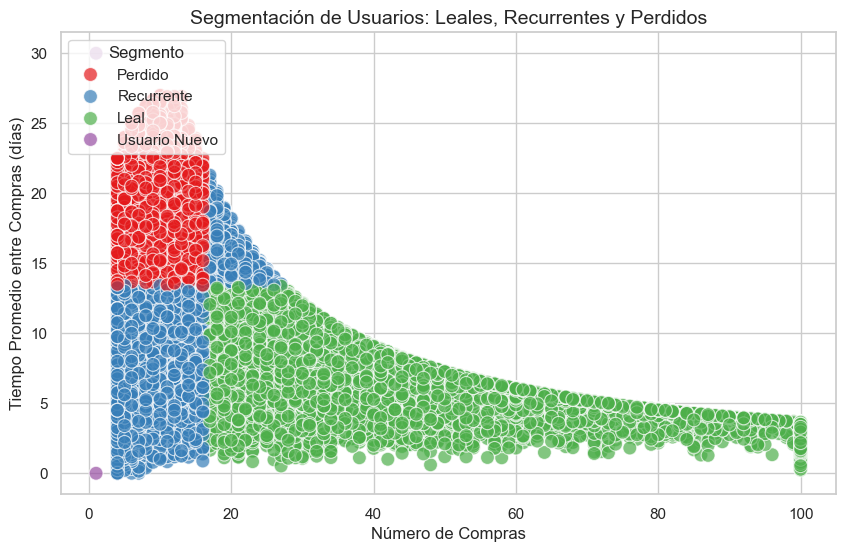

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar el número de compras contra el tiempo entre compras
sns.scatterplot(data=user_orders, x='n_compras', y='mean_time_between_orders', hue='segmento', palette='Set1', s=100, alpha=0.7)

# Añadir etiquetas y título
plt.title('Segmentación de Usuarios: Leales, Recurrentes y Perdidos', fontsize=14)
plt.xlabel('Número de Compras', fontsize=12)
plt.ylabel('Tiempo Promedio entre Compras (días)', fontsize=12)
plt.legend(title='Segmento', loc='upper left')

# Mostrar gráfico
plt.show()


Descargar csv

In [36]:
user_orders.to_csv('data/user_orders_segmentados.csv', index=True)

# **SEGMENTACION POR CANTIDAD DE PEDIDOS TOTALES Y CADA CUANTO PIDE POR METODO CODO **

Preparamos los datos en un csv

Segmentar a los usuarios

Graficar los usuarios

Descargar csv

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_users_data = pd.read_csv('data/user_orders_data.csv', sep=",")

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_users_data)

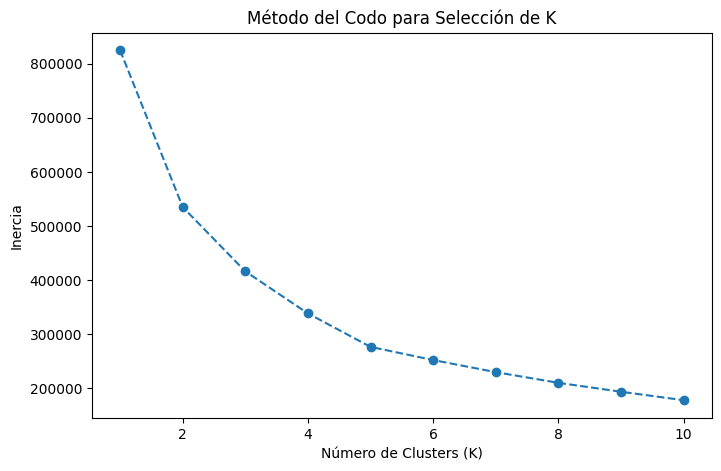

In [17]:
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de K')
plt.show()

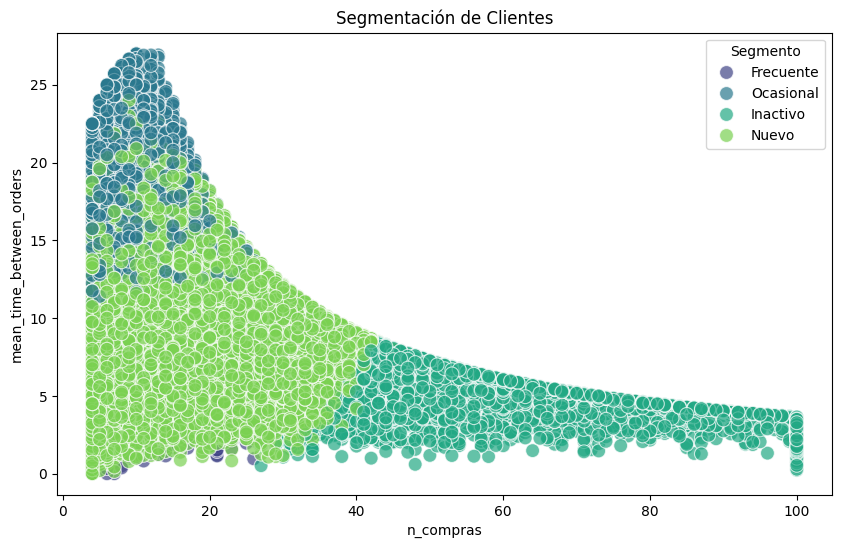

In [29]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los clusters
segment_labels = {
    0: "Frecuente",
    1: "Nuevo",
    2: "Ocasional",
    3: "Inactivo"
}

# Aplicar K-Means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_users_data['Segmento'] = kmeans.fit_predict(data_scaled)  # 🔹 Primero aplicar K-Means

# Mapear los números de los clusters a etiquetas
df_users_data['Segmento'] = df_users_data['Segmento'].map(segment_labels)  # 🔹 Ahora sí mapear

# 🔹 Visualización de Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_users_data['n_compras'], 
    y=df_users_data['mean_time_between_orders'], 
    hue=df_users_data['Segmento'],  # 🔹 Ahora sí tiene los nombres correctos
    palette='viridis', 
    s=100, alpha=0.7
)
plt.title("Segmentación de Clientes")
plt.show()


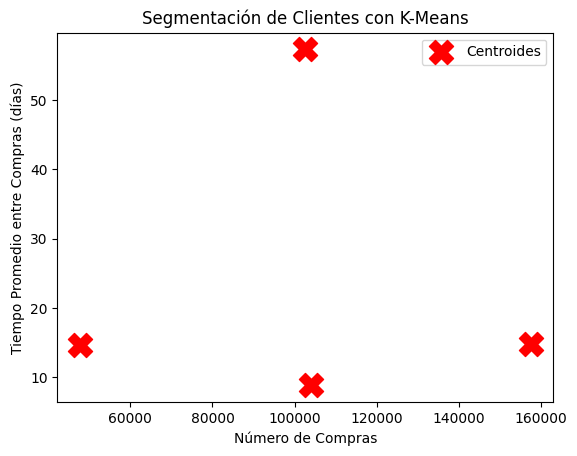

In [30]:
# 🔹 6. Desescalar centroides antes de graficarlos
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    s=300, c='red', marker='X', label='Centroides'
)

plt.xlabel("Número de Compras")
plt.ylabel("Tiempo Promedio entre Compras (días)")
plt.title("Segmentación de Clientes con K-Means")
plt.legend()
plt.show()

In [32]:
df_users_data.to_csv('data/segmented_users.csv', index=False)